# Análisis y Visualización de Datos con Python
## Gilber Tellez



In [ ]:
import pandas as pd
!pip install yfinance
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Teoría de Portafolio de Markowitz**

La idea principal de la teoría moderna del portafolio de Markowitz es que la relación que existe entre el riesgo y la rentabilidad de un mismo activo financiero no se debe analizar o evaluar de manera individual, al contrario, se debe valorar el contexto, la relación que hay entre el riesgo y la rentabilidad, pero desde la perspectiva del conjunto de la cartera.

La teoría moderna del portafolio de Markowitz nos demuestra, a través de una serie de formulaciones, que es totalmente factible la construcción de una cartera, con diversidad de activos, a manera de que aumente la rentabilidad que se espera para un determinado nivel de riesgo. Ahora bien, ya que se espera un nivel determinado de rentabilidad, los inversores pueden construir una cartera con los menores riesgos posibles respecto a esa rentabilidad.

Para lograr esto, medidas como la correlación y la varianza permiten de manera eficaz la construcción de carteras con menor riesgo, al contrario de si nos decantamos por activos, pero de forma individual.

 Si nosotros quisiéramos calcular el retorno esperado (cuanto porcentualmente se espera ganar con este título), tenemos que utilizar la formula estadística de la esperanza, que es la siguiente:

 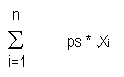

 Donde:

PS: Probabilidad de ocurrencia.

Xi: Retorno esperado del escenario para el Título a analizar

In [ ]:
def returnsChart(portafolio,startD, endD):#Recibe un arreglo con los códigos de los activos presentes dentro del protafolio start y end =AAAA-MM-DD
  df=pd.DataFrame({})
  df2=pd.DataFrame({})
  for element in portafolio:
    df[f"{element}"]=yf.download(element,  start=startD, end=endD)['Close']
    r=[]
    for i in range(len(df[f"{element}"])):
      if i>0:
        r.append((df[f"{element}"][i]-df[f"{element}"][i-1])/df[f"{element}"][i-1])
      else:
        r.append(np.NaN)
    df2[f"{element}"]=r
    df2["Date"]=df.index.values
    df2=df2.set_index('Date')
    mus=(1+df2.mean())**252 - 1
    cov = df2.cov()*252
  return df, df2, mus, cov
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

def plotEF(returns,mus):
  wagesR=[]
  expectedReturn=[]
  expectedVolatility=[]
  sharpeRatio=[]
  for i in range(10000):
    w=np.array(np.random.random(len(returns.columns)))
    w=w/np.sum(w)
    wagesR.append(w)
    expectedReturn.append(portfolio_return(w, mus))
    expectedVolatility.append(portfolio_vol(w, returns.cov()*252))
    sharpeRatio.append(portfolio_return(w, mus)/portfolio_vol(w, buffetReturns.cov()*252))
  return np.array(wagesR), np.array(expectedReturn), np.array(expectedVolatility), np.array(sharpeRatio)

def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol

    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x


In [ ]:
buffetPrices, buffetReturns, buffetAR, buffetCov=returnsChart(['AAPL','BAC','AXP','CVX','KO'],"2014-01-01","2019-12-31") #AR Annualised return
burryPrices, burryReturns, burryAR, burryCov =returnsChart(['AAPL','BMY','BKNG','WBD','GOOGL'],"2014-01-01","2019-12-31")
ackmanPrices, ackmanReturns, ackmanAR, ackmanCov=returnsChart(['AAPL','LOW','CMG','HLT','HHC'],"2014-01-01","2019-12-31")
spPrices, spReturns, spAR, spCov=returnsChart(['AAPL','MSFT','AMZN','TSLA','GOOGL'],"2014-01-01","2019-12-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
buffetPrices.describe()

,AAPL,BAC,AXP,CVX,KO
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,35.998768,22.039821,88.880517,111.331975,44.361040
std,11.662681,6.449901,17.601934,12.354084,3.903368
min,17.849285,11.160000,51.110001,70.019997,37.099998
25%,26.982500,16.110001,77.029999,104.059998,41.639999
50%,32.340000,22.570000,88.120003,113.879997,43.599998
75%,43.955002,28.540001,100.150002,120.139999,46.009998
max,72.879997,35.520000,128.570007,134.850006,55.770000


In [ ]:
buffetReturns.describe()

,AAPL,BAC,AXP,CVX,KO
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000984,0.000642,0.000299,0.000068,0.000245
std,0.015344,0.015765,0.012682,0.013538,0.009073
min,-0.099607,-0.074074,-0.121009,-0.055666,-0.084354
25%,-0.006007,-0.007558,-0.005328,-0.006793,-0.004322
50%,0.000889,0.000423,0.000544,0.000084,0.000440
75%,0.008924,0.009789,0.006849,0.007128,0.005248
max,0.081982,0.071563,0.090286,0.063373,0.060718


In [ ]:
buffetAR.describe()

count    5.000000
mean     0.123225
std      0.105468
min      0.017353
25%      0.063663
50%      0.078246
75%      0.175626
max      0.281239
dtype: float64

In [ ]:
burryPrices.describe()

,AAPL,BMY,BKNG,WBD,GOOGL
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,35.998768,57.571385,1566.383473,29.496004,43.343170
std,11.662681,7.248445,337.997519,5.625422,12.294144
min,17.849285,42.770000,973.799988,16.280001,24.853001
25%,26.982500,51.150002,1245.369995,26.190001,30.319571
50%,32.340000,56.919998,1536.109985,28.209999,41.006500
75%,43.955002,62.900002,1875.010010,32.330002,54.536999
max,72.879997,76.769997,2206.090088,45.528870,68.123497


Text(0.5, 1.0, 'Correlation Matrix Buffet Portfolio')

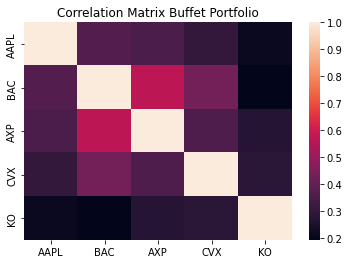

In [ ]:
sns.heatmap(buffetReturns.corr())
plt.title("Correlation Matrix Buffet Portfolio")

In [ ]:
burryReturns.describe()

,AAPL,BMY,BKNG,WBD,GOOGL
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000984,0.000261,0.000524,-0.000026,0.000690
std,0.015344,0.015935,0.016445,0.019595,0.014731
min,-0.099607,-0.159851,-0.135197,-0.121424,-0.075019
25%,-0.006007,-0.007036,-0.006933,-0.010139,-0.006059
50%,0.000889,0.000864,0.001005,-0.000361,0.000767
75%,0.008924,0.008210,0.008892,0.010687,0.008329
max,0.081982,0.088996,0.112436,0.120621,0.162584


In [ ]:
burryAR.describe()

count    5.000000
mean     0.134686
std      0.110620
min     -0.006521
25%      0.067917
50%      0.141055
75%      0.189743
max      0.281239
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Burry Portfolio')

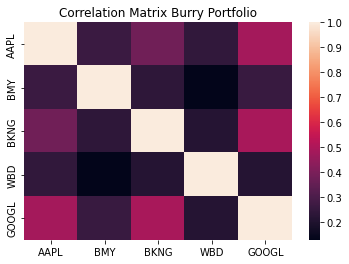

In [ ]:
sns.heatmap(burryReturns.corr())
plt.title("Correlation Matrix Burry Portfolio")

In [ ]:
ackmanPrices.describe()

,AAPL,LOW,CMG,HLT,HHC
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,35.998768,79.836455,533.871319,63.809143,124.607243
std,11.662681,18.751388,149.451105,17.419202,15.497510
min,17.849285,44.630001,251.330002,35.253361,81.339996
25%,26.982500,69.550003,417.950012,48.817081,113.080002
50%,32.340000,77.000000,501.769989,58.564079,123.849998
75%,43.955002,95.010002,662.820007,78.379997,135.500000
max,72.879997,120.230003,851.539978,112.389999,160.000000


In [ ]:
ackmanReturns.describe()

,AAPL,LOW,CMG,HLT,HHC
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000984,0.000696,0.000522,0.000708,0.000213
std,0.015344,0.014647,0.020663,0.014483,0.018881
min,-0.099607,-0.118452,-0.145822,-0.073327,-0.158592
25%,-0.006007,-0.006650,-0.008624,-0.007291,-0.007412
50%,0.000889,0.001099,0.000518,0.000582,0.000337
75%,0.008924,0.008252,0.009710,0.009051,0.007776
max,0.081982,0.104257,0.244404,0.067949,0.417540


In [ ]:
ackmanAR.describe()

count    5.000000
mean     0.172718
std      0.082914
min      0.055160
25%      0.140440
50%      0.191511
75%      0.195240
max      0.281239
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Ackman Portfolio')

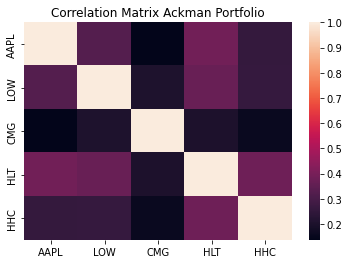

In [ ]:
sns.heatmap(ackmanReturns.corr())
plt.title("Correlation Matrix Ackman Portfolio")

In [ ]:
spPrices.describe()

,AAPL,MSFT,AMZN,TSLA,GOOGL
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,35.998768,74.567078,49.194320,17.413764,43.343170
std,11.662681,32.581451,28.316526,3.677538,12.294144
min,17.849285,34.980000,14.347500,9.289333,24.853001
25%,26.982500,47.000000,21.969500,14.542000,30.319571
50%,32.340000,62.639999,40.894001,16.589333,41.006500
75%,43.955002,101.050003,80.145500,20.562668,54.536999
max,72.879997,158.960007,101.975502,28.729334,68.123497


In [ ]:
spReturns.describe()

,AAPL,MSFT,AMZN,TSLA,GOOGL
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000984,0.001060,0.001194,0.001083,0.000690
std,0.015344,0.014284,0.018772,0.028682,0.014731
min,-0.099607,-0.092533,-0.109972,-0.139015,-0.075019
25%,-0.006007,-0.005870,-0.007016,-0.013374,-0.006059
50%,0.000889,0.000765,0.001166,0.000377,0.000767
75%,0.008924,0.008058,0.010024,0.016291,0.008329
max,0.081982,0.104522,0.141311,0.176692,0.162584


In [ ]:
spAR.describe()

count    5.000000
mean     0.288259
std      0.060430
min      0.189743
25%      0.281239
50%      0.306076
75%      0.313573
max      0.350663
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix S&P 5 Portfolio')

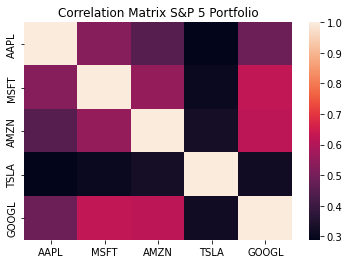

In [ ]:
sns.heatmap(spReturns.corr())
plt.title("Correlation Matrix S&P 5 Portfolio")

Text(0.5, 1.0, 'Prices S&P 5 Portfolio')

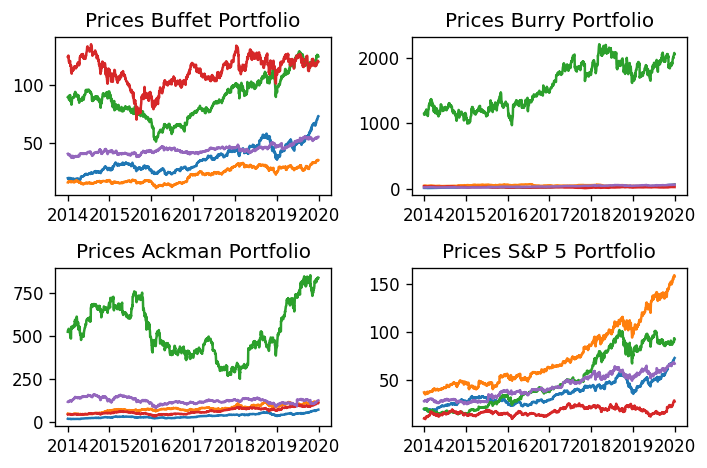

In [ ]:
fig1, (set1, set2) = plt.subplots(tight_layout=True,
                                        dpi = 120,
                                        nrows=2,
                                        ncols=2)
set1[0].plot(buffetPrices)
set1[0].set_title("Prices Buffet Portfolio")
set1[1].plot(burryPrices)
set1[1].set_title("Prices Burry Portfolio")
set2[0].plot(ackmanPrices)
set2[0].set_title("Prices Ackman Portfolio")
set2[1].plot(spPrices)
set2[1].set_title("Prices S&P 5 Portfolio")

Text(0.5, 1.0, 'Returns S&P 5 Portfolio')

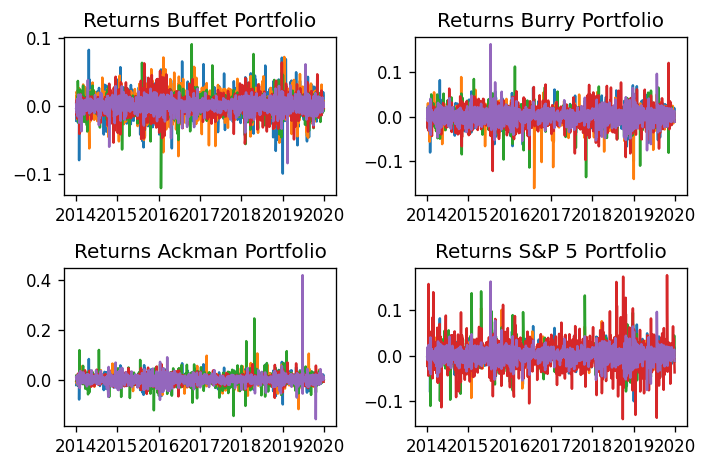

In [ ]:
fig2, (set11, set22) = plt.subplots(tight_layout=True,
                                        dpi = 120,
                                        nrows=2,
                                        ncols=2)
set11[0].plot(buffetReturns)
set11[0].set_title("Returns Buffet Portfolio")
set11[1].plot(burryReturns)
set11[1].set_title("Returns Burry Portfolio")
set22[0].plot(ackmanReturns)
set22[0].set_title("Returns Ackman Portfolio")
set22[1].plot(spReturns)
set22[1].set_title("Returns S&P 5 Portfolio")

In [ ]:
usfrisk=3.4/100

In [ ]:
bfwages,bfExpectedReturn, bfExpectedvolatility, bfSharpeRatio=plotEF(buffetReturns,buffetAR)
brwages,brExpectedReturn, brExpectedvolatility, brSharpeRatio=plotEF(burryReturns,burryAR)
ackwages,ackExpectedReturn, ackExpectedvolatility, ackSharpeRatio=plotEF(ackmanReturns,ackmanAR)
spwages,spExpectedReturn, spExpectedvolatility, spSharpeRatio=plotEF(spReturns,spAR)

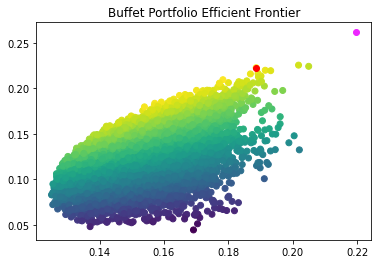

In [ ]:
plt.scatter(bfExpectedvolatility,bfExpectedReturn, c=bfSharpeRatio)
plt.title("Buffet Portfolio Efficient Frontier")

maxIndexBF= bfSharpeRatio.argmax()
bfwages[maxIndexBF,:]
w=msr(usfrisk,buffetAR,buffetCov)
plt.scatter(bfExpectedvolatility[maxIndexBF],bfExpectedReturn[maxIndexBF], c="r")
plt.scatter(portfolio_vol(msr(usfrisk,buffetAR,buffetCov),buffetCov),portfolio_return(msr(usfrisk,buffetAR,buffetCov),buffetAR),c="#ED26FF")


[7.91891357e-01 4.28517356e-15 1.66304416e-14 0.00000000e+00
 2.08108643e-01] [0.3576264  0.01516981 0.04480404 0.02859415 0.5538056 ]


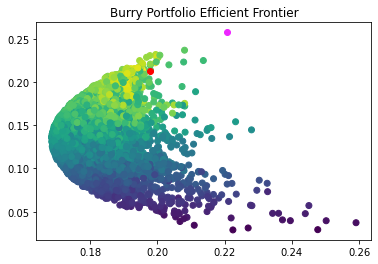

In [ ]:
plt.scatter(brExpectedvolatility,brExpectedReturn, c=brSharpeRatio)
plt.title("Burry Portfolio Efficient Frontier")
maxIndexBR= brSharpeRatio.argmax()
brwages[maxIndexBR,:]
plt.scatter(brExpectedvolatility[maxIndexBR],brExpectedReturn[maxIndexBR], c="r")
print(msr(usfrisk,burryAR,burryReturns.cov()), brwages[maxIndexBR,:])
plt.scatter(portfolio_vol(msr(usfrisk,burryAR,burryCov),burryCov),portfolio_return(msr(0,burryAR,burryCov),burryAR),c="#ED26FF")

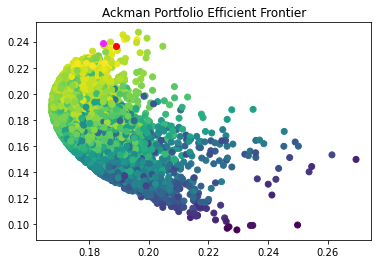

In [ ]:
plt.scatter(ackExpectedvolatility,ackExpectedReturn, c=ackSharpeRatio)
plt.title("Ackman Portfolio Efficient Frontier")
maxIndexAC= ackSharpeRatio.argmax()
ackwages[maxIndexAC,:]
plt.scatter(ackExpectedvolatility[maxIndexAC],ackExpectedReturn[maxIndexAC], c="r")
plt.scatter(portfolio_vol(msr(usfrisk,ackmanAR,ackmanCov),ackmanCov),portfolio_return(msr(usfrisk,ackmanAR,ackmanCov),ackmanAR), c="#ED26FF")


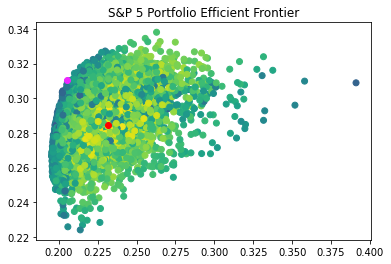

In [ ]:
plt.scatter(spExpectedvolatility,spExpectedReturn, c=spSharpeRatio)
plt.title("S&P 5 Portfolio Efficient Frontier")
maxIndexSP=spSharpeRatio.argmax()
plt.scatter(spExpectedvolatility[maxIndexSP],spExpectedReturn[maxIndexSP], c="r")
plt.scatter(portfolio_vol(msr(usfrisk,spAR,spCov),spCov),portfolio_return(msr(usfrisk,spAR,spCov),spAR), c="#ED26FF")

# **BIBLIOGRAFÍA**


* Teoría de Portafolio de Markowitz: concepto y ejemplos. (2022). Retrieved 20
September 2022, from https://www.rankia.cl/blog/analisis-ipsa/3500963-teoria-portafolio-markowitz-concepto-ejemplos

* yfinance 0.1.74 a Yahoo finance API for python (2022). Retrieved 20
September 2022, from https://pypi.org/project/yfinance/
